<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/DescriptiveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Gaussian

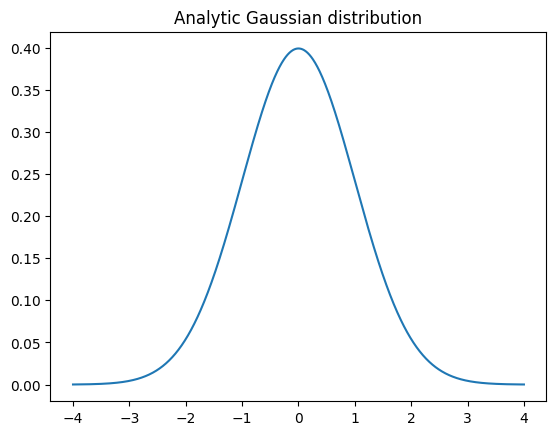

In [ ]:
N = 1001

x = np.linspace(-4, 4, N)
gausdist = stats.norm.pdf(x)

plt.plot(x, gausdist)
plt.title('Analytic Gaussian distribution')
plt.show()

In [ ]:
print(sum(gausdist)) # sum != 1, so not a probability distribution

124.99221530601626


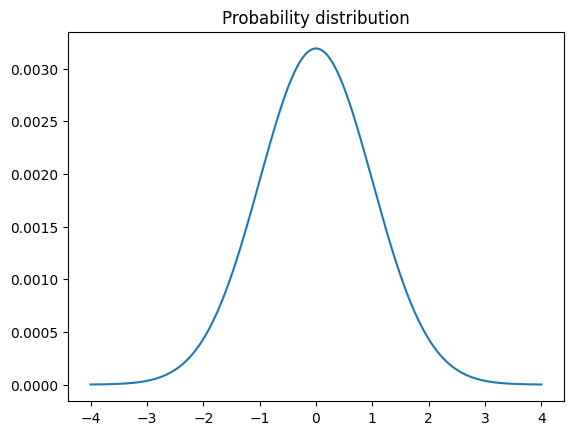

In [ ]:
# Get probability distribution

prob_dist = gausdist / sum(gausdist)

plt.plot(x, prob_dist)
plt.title('Probability distribution')
plt.show()

In [ ]:
print(sum(prob_dist))

0.9999999999999996


## Normally-distributed random numbers

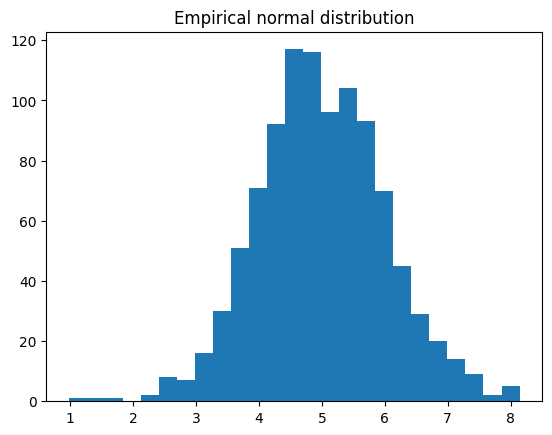

4.999031033665751


In [ ]:
stretch = 1 # variance
shift = 5 # mean
n = 1000

data = stretch * np.random.randn(n) + shift

plt.hist(data, 25)
plt.title('Empirical normal distribution')
plt.show()
print(np.mean(data))

## Uniform distribution

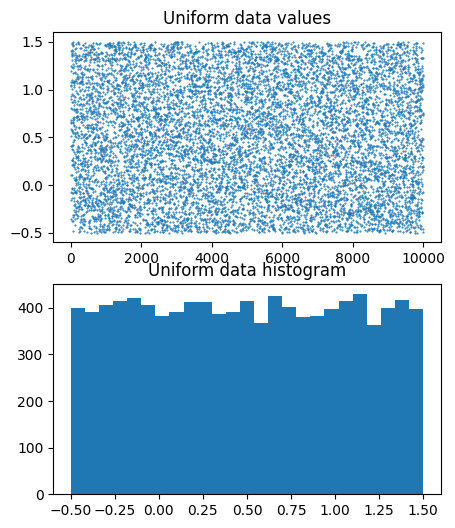

In [ ]:
stretch = 2 # not the variance
shift = .5 # mean
n = 10000

data = stretch * np.random.rand(n) + shift - stretch/2

fig, ax = plt.subplots(2, 1, figsize=(5, 6))

ax[0].plot(data, '.', markersize=1)
ax[0].set_title('Uniform data values')

ax[1].hist(data, 25)
ax[1].set_title('Uniform data histogram')

plt.show()

## log-normal

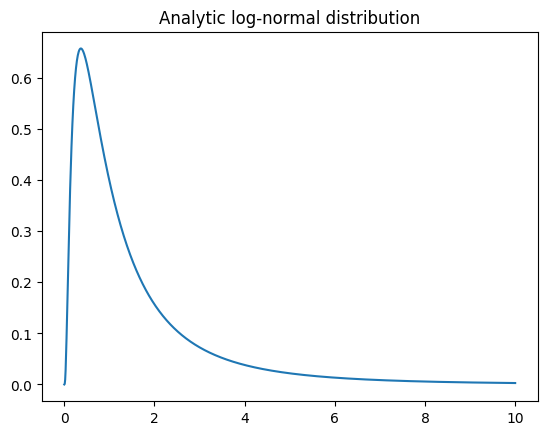

In [ ]:
N = 1001
x = np.linspace(0, 10, N)
lognormdist = stats.lognorm.pdf(x, 1)

plt.plot(x, lognormdist)
plt.title('Analytic log-normal distribution')
plt.show()

## Empirical log-normal distribution

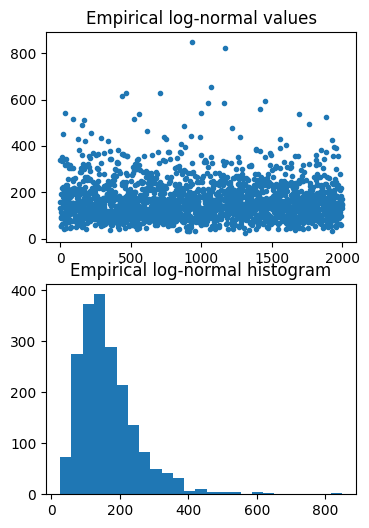

In [ ]:
shift = 5 # mean?
stretch = .5 # std dev?
n = 2000

data = stretch * np.random.randn(n) + shift
data = np.exp(data)

fig, ax = plt.subplots(2, 1, figsize=(4, 6))
ax[0].plot(data, '.')
ax[0].set_title('Empirical log-normal values')

ax[1].hist(data, 25)
ax[1].set_title('Empirical log-normal histogram')

plt.show()

## Binomial

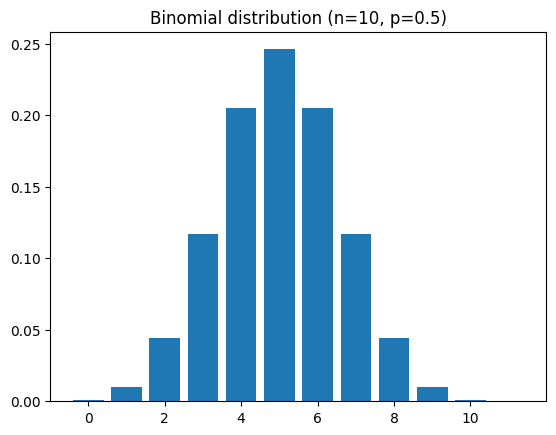

In [ ]:
# probability of getting K heads in N coin tosses
# given a probability of p heads (e.g. p = 0.5)

n = 10
p = .5

x = range(n+2)
bindist = stats.binom.pmf(x, n, p)

plt.bar(x, bindist)
plt.title(f'Binomial distribution (n={n}, p={p})')
plt.show()

## t distribution

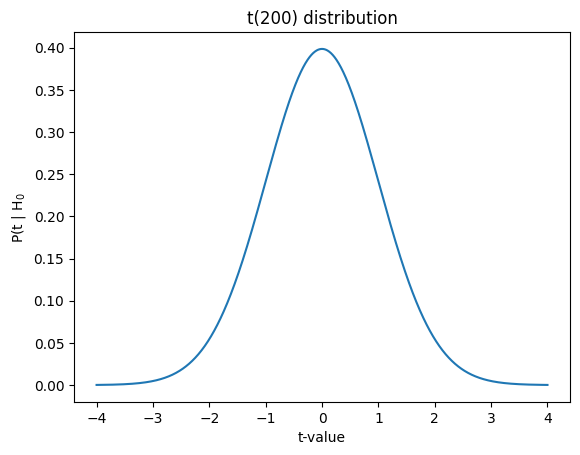

In [ ]:
x = np.linspace(-4, 4, 1001)
df = 200 # if smaller, the tails are fatter and shape is thinner in the middle
t = stats.t.pdf(x, df)

plt.plot(x, t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$_0$')
plt.title(f"t({df}) distribution")
plt.show()

## F distribution - evaluate statistical significance

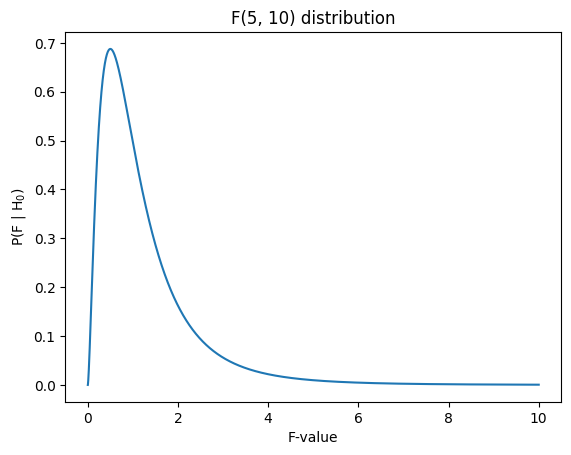

In [ ]:
num_df = 5 # numerator deg of freedom
den_df = 10 # denominator deg of freedom

x = np.linspace(0, 10, 10001)

fdist = stats.f.pdf(x, num_df, den_df)

plt.plot(x, fdist)
plt.xlabel('F-value')
plt.ylabel('P(F | H$_0$)')
plt.title(f"F({num_df}, {den_df}) distribution")
plt.show()

## Measures of Central Tendency

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

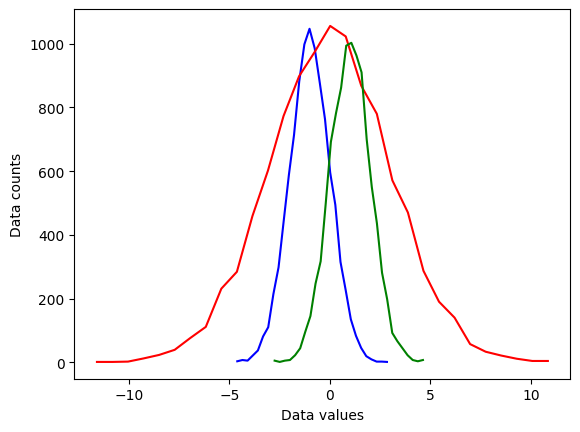

In [ ]:
N = 10001
nbins = 30

d1 = np.random.randn(N) - 1
d2 = 3 * np.random.randn(N)
d3 = np.random.randn(N) + 1

y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:]+x1[:-1])/2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:]+x2[:-1])/2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:]+x3[:-1])/2

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'g')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

### mean

In [ ]:
mean_d1 = sum(d1)/len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--')
plt.plot([mean_d2, mean_d2], [0, max(y2)], 'r--')
plt.plot([mean_d3, mean_d3], [0, max(y3)], 'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

NameError: name 'd1' is not defined

### "failure" of the mean

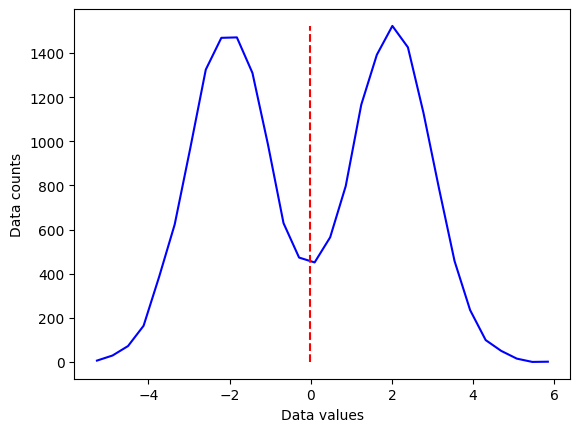

In [ ]:
# new dataset of distribution combinations
d4 = np.hstack((np.random.randn(N)-2, np.random.randn(N)+2))

[y4, x4] = np.histogram(d4, nbins)
x4 = (x4[1:]+x4[:-1])/2

mean_d4 = np.mean(d4)

plt.plot(x4, y4, 'b')
plt.plot([mean_d4, mean_d4], [0, max(y4)], 'r--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

### median

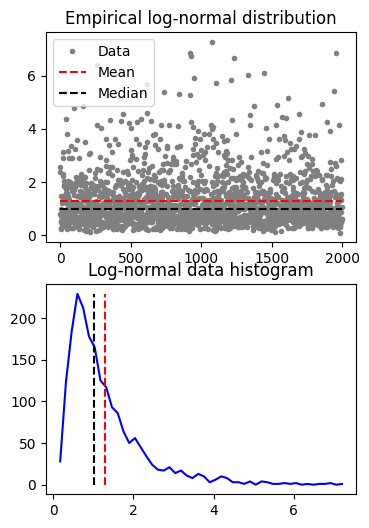

In [ ]:
# log-normal distribution
shift = 0
stretch = 0.7
n = 2000
nbins = 50

data = stretch * np.random.randn(n) + shift
data = np.exp(data)

y, x = np.histogram(data, nbins)
x = (x[1:]+x[:-1])/2

datamean = np.mean(data)
datamedian = np.median(data)

fig, ax = plt.subplots(2, 1, figsize=(4, 6))

ax[0].plot(data, '.', color=[.5, .5, .5], label='Data')
ax[0].plot([1, n], [datamean, datamean], 'r--', label='Mean')
ax[0].plot([1, n], [datamedian, datamedian], 'k--', label='Median')
ax[0].set_title('Empirical log-normal distribution')
ax[0].legend()

ax[1].plot(x, y, 'b')
ax[1].plot([datamean, datamean], [0, max(y)], 'r--')
ax[1].plot([datamedian, datamedian], [0, max(y)], 'k--')
ax[1].set_title('Log-normal data histogram')
plt.show()

### mode

In [ ]:
data = np.round(np.random.randn(10))
print(data)

[-1.  3. -0.  2. -1. -1.  1. -0.  1.  1.]


In [ ]:
uniq_data = np.unique(data)
for i in range(len(uniq_data)):
  print(f"{uniq_data[i]} appears {sum(data == uniq_data[i])} times.")

-1.0 appears 3 times.
-0.0 appears 2 times.
1.0 appears 3 times.
2.0 appears 1 times.
3.0 appears 1 times.


In [ ]:
print(f"The modal value is {stats.mode(data)[0]}")

The modal value is -1.0


## Computing dispersion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

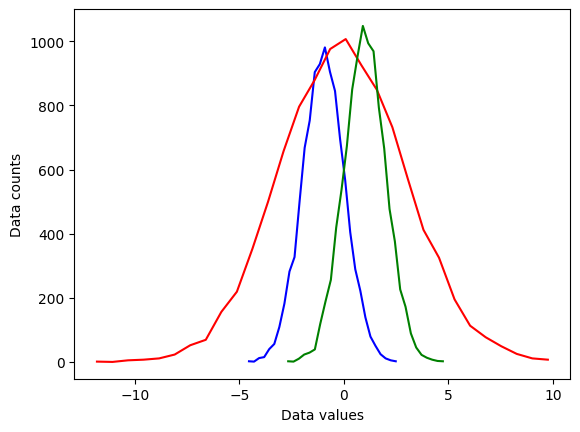

In [ ]:
N = 10001
nbins = 30

d1 = np.random.randn(N) - 1
d2 = 3 * np.random.randn(N)
d3 = np.random.randn(N) + 1

y1, x1 = np.histogram(d1, nbins)
x1 = (x1[1:]+x1[:-1])/2

y2, x2 = np.histogram(d2, nbins)
x2 = (x2[1:]+x2[:-1])/2

y3, x3 = np.histogram(d3, nbins)
x3 = (x3[1:]+x3[:-1])/2

plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'r')
plt.plot(x3, y3, 'g')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [ ]:
# side note

meanval = 10.2
stdval = 7.5
numsamp = 123

np.random.normal(meanval, stdval, numsamp)

np.random.randn(numsamp) * stdval + meanval


# both of the above are equivalent

array([ 10.7042653 ,   0.59381715,   9.24024273,   6.51512014,
         3.39456901,  21.32920547,  13.49671869,   8.21637586,
        20.85023697,  17.70169501,  -3.02379889,  16.28979195,
        15.13384356,  24.5870518 ,   9.54859714,  -0.32784993,
        13.08406265,   5.27937154,  -0.73304568,  14.26871251,
        10.97829384,   3.43771615,  16.98728565,   7.95717041,
        16.09464873,   7.85352029,   8.66228936,  15.20588458,
        11.8862216 ,  12.92261993,   3.90384249,   2.46202485,
        -6.84306198,   4.05126383,  13.3569397 ,   9.92587634,
        18.19823316,  21.2598775 ,   8.81629666,  -1.48705566,
        18.94134567,   3.34867881,  20.08795903,  18.44133868,
        10.97047329,  11.27092473,  22.77567562,  19.32320636,
        -7.97295916,  11.8441665 ,  11.3192461 ,  26.87328506,
         5.11659337,  24.63781102,   4.79135836,  19.48985848,
         6.92058538,   7.51500733,   5.75658777,   8.54559179,
        23.75768244,   6.93513064,  11.73386944,  15.79

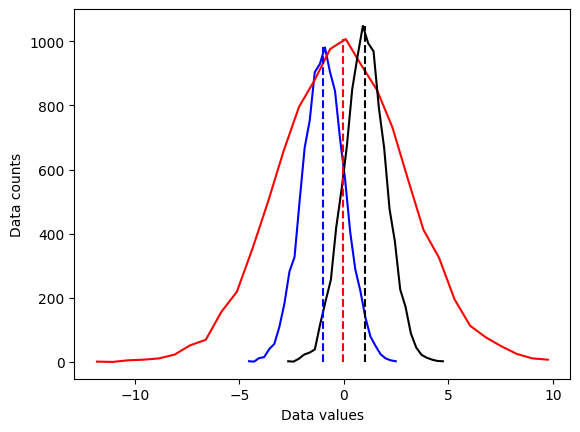

In [ ]:
mean_d1 = sum(d1)/len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--')
plt.plot([mean_d2, mean_d2], [0, max(y2)], 'r--')
plt.plot([mean_d3, mean_d3], [0, max(y3)], 'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

### standard deviation

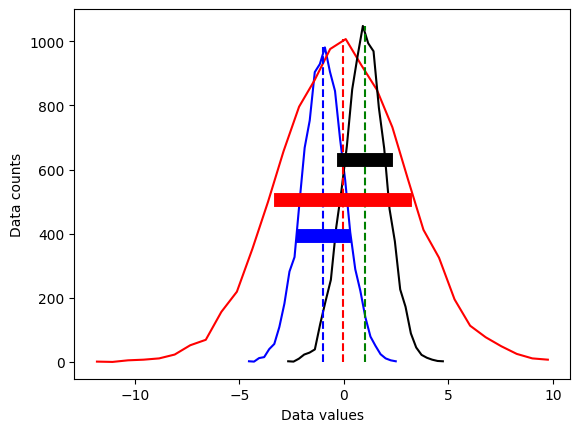

In [ ]:
stds = np.zeros(3)

stds[0] = np.std(d1, ddof=1)
stds[1] = np.std(d2, ddof=1)
stds[2] = np.std(d3, ddof=1)

plt.plot(x1, y1, 'b', x2, y2, 'r', x3, y3, 'k')
plt.plot([mean_d1, mean_d1], [0, max(y1)], 'b--', [mean_d2, mean_d2], [0, max(y2)], 'r--', [mean_d3, mean_d3], [0, max(y3)], 'g--')

plt.plot([mean_d1-stds[0], mean_d1+stds[0]], [.4*max(y1), .4*max(y1)], 'b', linewidth=10)
plt.plot([mean_d2-stds[1], mean_d2+stds[1]], [.5*max(y2), .5*max(y2)], 'r', linewidth=10)
plt.plot([mean_d3-stds[2], mean_d3+stds[2]], [.6*max(y3), .6*max(y3)], 'k', linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

### different variance measures

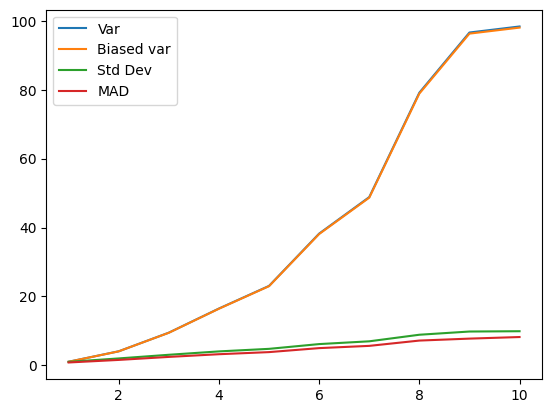

In [ ]:
variances = np.arange(1, 11)
N = 300

varmeasures = np.zeros((4, len(variances)))

for i in range(len(variances)):
  # create data and mean-center
  data = np.random.randn(N) * variances[i]
  datacent = data - np.mean(data)

  # variance
  varmeasures[0, i] = sum(datacent**2) / (N-1)

  # 'biased' variance
  varmeasures[1, i] = sum(datacent**2) / N

  # standard deviation
  varmeasures[2, i] = np.sqrt(sum(datacent**2) / (N-1))

  # Mean Absolute Deviation (MAD)
  varmeasures[3, i] = sum(abs(datacent)) / (N-1)

plt.plot(variances, varmeasures.T)
plt.legend(('Var', 'Biased var', 'Std Dev', 'MAD'))
plt.show()

### Fano Factor and coefficient of variation (CV)

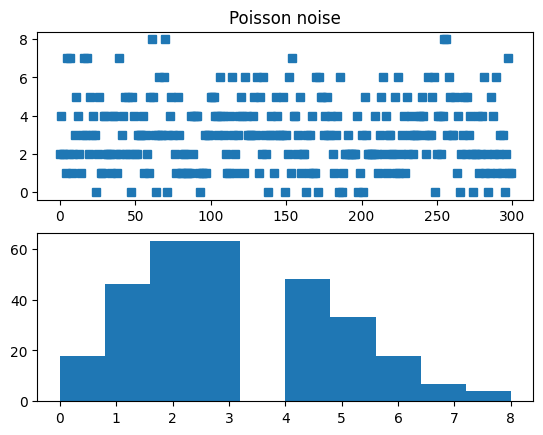

In [ ]:
# need positive valued data, so using Poisson noise here
data = np.random.poisson(3, 300) # Poisson noise -> count of number of iterations it takes to reach up to some threshold

fig, ax = plt.subplots(2, 1)
ax[0].plot(data, 's')
ax[0].set_title('Poisson noise')

ax[1].hist(data)

plt.show()

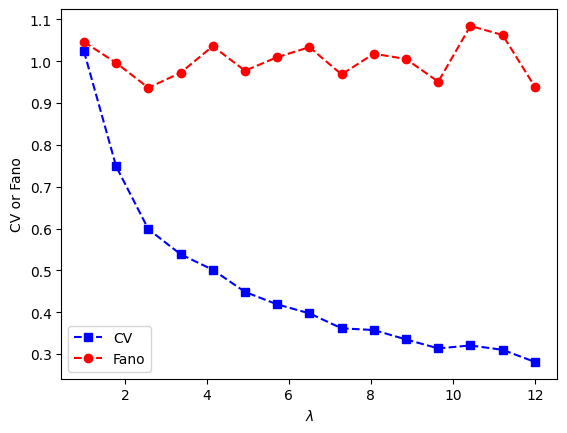

In [ ]:
# list of parameters
lambdas = np.linspace(1, 12, 15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv = np.zeros(len(lambdas))

for li in range(len(lambdas)):
  data = np.random.poisson(lambdas[li], 1000)

  cv[li] = np.std(data) / np.mean(data)
  fano[li] = np.var(data) / np.mean(data)

plt.plot(lambdas, cv, 'bs--')
plt.plot(lambdas, fano, 'ro--')
plt.legend(('CV', 'Fano'))
plt.xlabel(r'$\lambda$')
plt.ylabel('CV or Fano')
plt.show()

In [ ]:
# CV decreases with increasing lambda. Fano oscillates around 1
# A Poisson process has its variance equal to its mean
# Can compute Fano factor to verify if a process is Poisson distributed or not

### Inter-quartile range

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
n = 1000
data = np.random.randn(n) ** 2

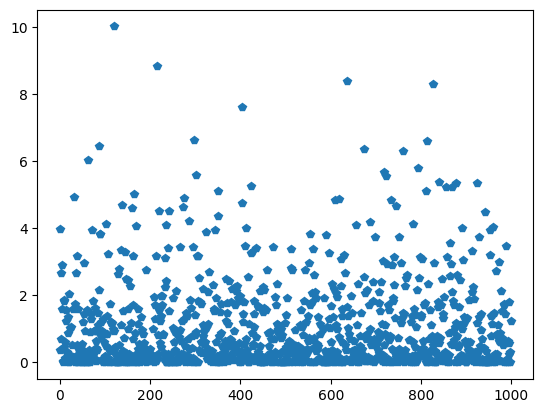

In [ ]:
plt.plot(data, 'p')
plt.show()

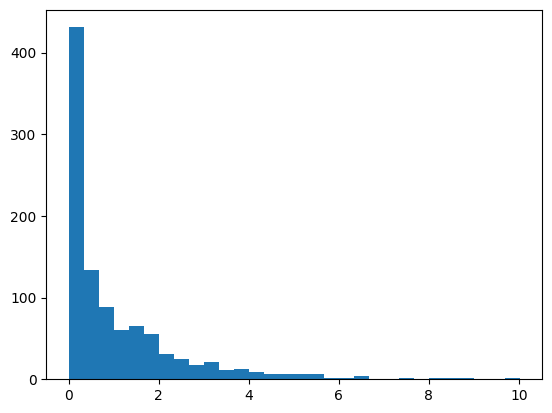

In [ ]:
plt.hist(data, bins=30)
plt.show()


In [ ]:
# rank-transform the data and scale to 1
dataR = stats.rankdata(data) / n

dataR[:5]

array([0.452, 0.952, 0.571, 0.889, 0.769])

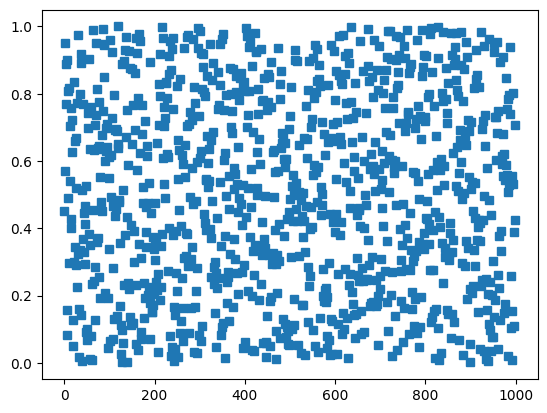

In [ ]:
plt.plot(dataR, 's')
plt.show()

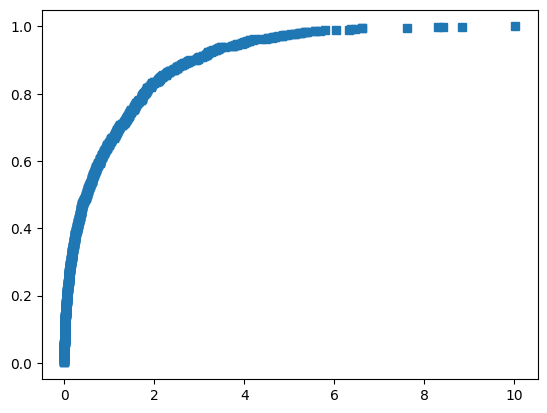

In [ ]:
plt.plot(data, dataR, 's')

In [ ]:
# find values closest to 25% and 75% of the distribution
q1 = np.argmin((dataR-.25)**2)
q3 = np.argmin((dataR-.75)**2)

# get the two values in the data
iq_vals = data[[q1, q3]]

# inter-quartile range is the distance between them
iqrange1 = iq_vals[1] - iq_vals[0]
iqrange1

np.float64(1.3850582844813804)

In [ ]:
# alternatively, use scipy.stats methods
iqrange2 = stats.iqr(data)
iqrange2

np.float64(1.385154415507212)

## QQ Plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

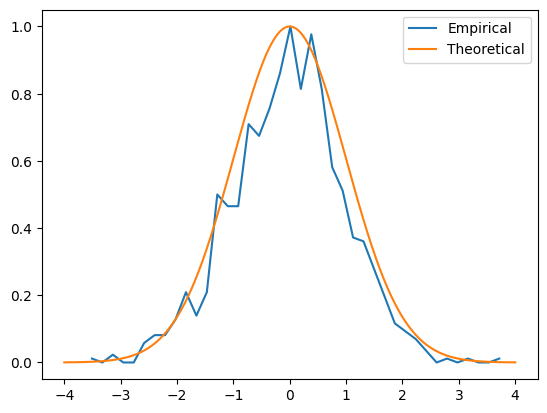

In [ ]:
## generate data

n = 1000
data = np.random.randn(n)

# theoretical normal distribution
x = np.linspace(-4,4,10001)
theonorm = stats.norm.pdf(x)
theonorm = theonorm/max(theonorm)

yy,xx = np.histogram(data, 40)
yy = yy/max(yy)
xx = (xx[1:]+xx[:-1])/2

plt.plot(xx, yy, label='Empirical')
plt.plot(x, theonorm, label='Theoretical')
plt.legend()
plt.show()

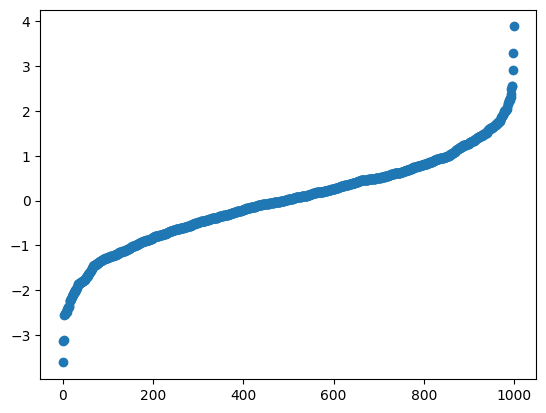

In [ ]:
## create QQ plot

# z-score -> normalization operation
# transforms the data to a mean of 0 and std dev of 1
zSortData = np.sort(stats.zscore(data))
sortNormal = stats.norm.ppf(np.linspace(0,1,n))

plt.plot(zSortData, 'o')

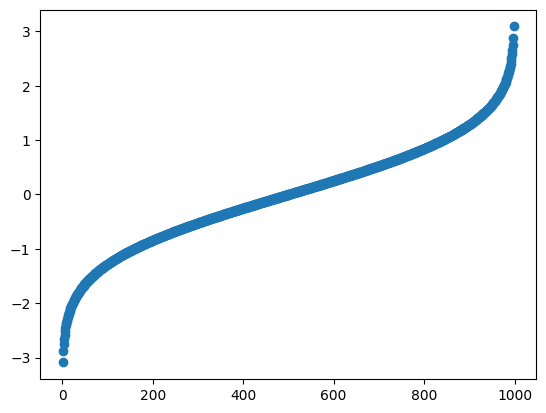

In [ ]:
plt.plot(sortNormal, 'o')

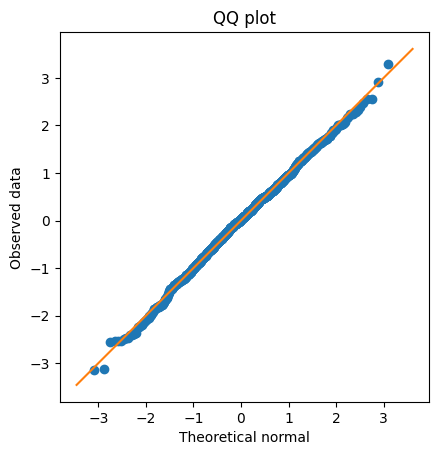

In [ ]:
# theoretical vs real
plt.plot(sortNormal, zSortData, 'o')

# set axes to be equal
xL, xR = plt.xlim()
yL, yR = plt.ylim()
lims = [np.min([xL,xR,yL,yR]), np.max([xL,xR,yL,yR])]
plt.xlim(lims)
plt.ylim(lims)

# draw comparison line
plt.plot(lims,lims)

plt.xlabel('Theoretical normal')
plt.ylabel('Observed data')
plt.title('QQ plot')
plt.axis('square')
plt.show()

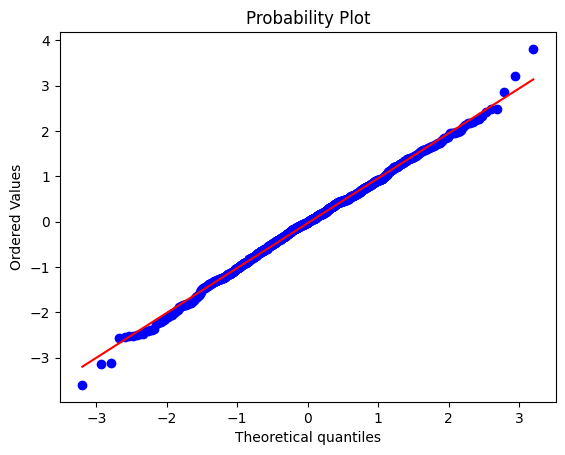

In [ ]:
# simple in Python

x = stats.probplot(data, plot=plt)

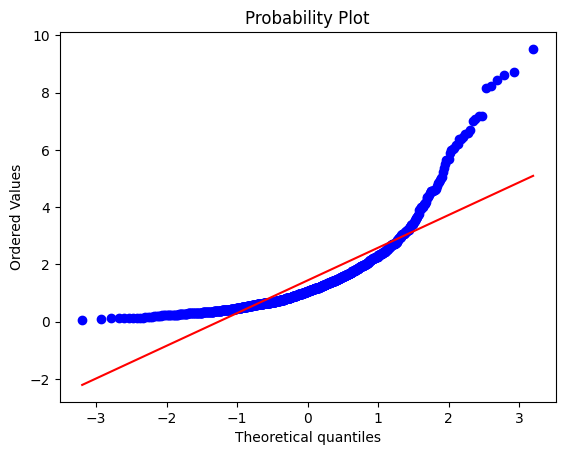

In [ ]:
# same thing for log-normal distribution

data1 = np.exp(np.random.randn(n) * .8)

x = stats.probplot(data1, plot=plt)

## Histogram bins

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

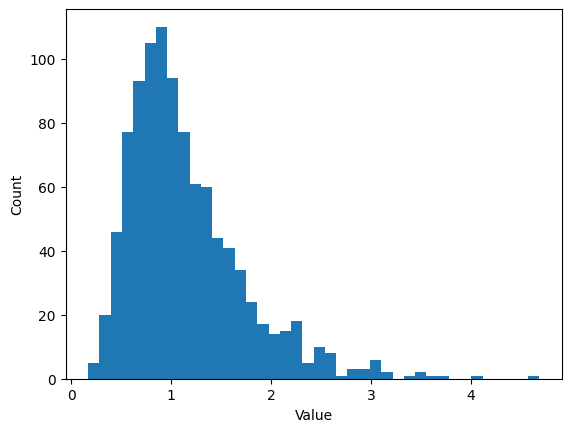

In [ ]:
n = 1000

# number of bins (arbitrary)
k = 40

# log-normal distribution
data = np.exp(np.random.randn(n)/2)

plt.hist(data, k)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

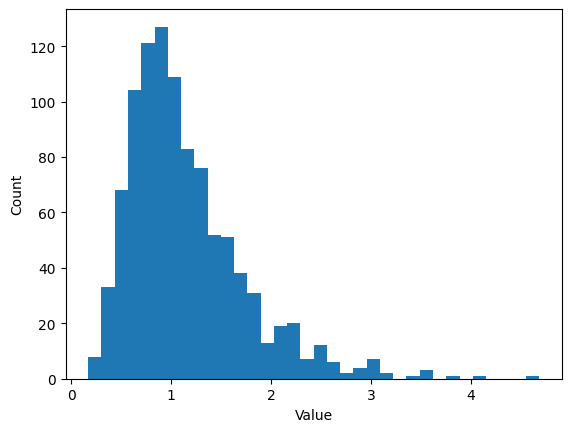

In [ ]:
## Freedman-Diaconis rule

# inter-quartile range
iqr = stats.iqr(data)

# bin width
h = 2*(iqr/np.power(n, 1/3))

# number of bins
k = np.ceil((np.max(data) - np.min(data))/h)

plt.hist(data, int(k))
# plt.hist(data, bins='fd') -> Freedman-Diaconis bins
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

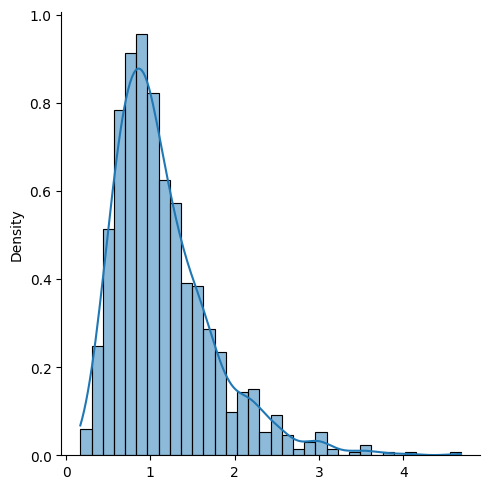

In [ ]:
# seaborn

import seaborn as sns

sns.displot(data, kind="hist", kde=True, stat="density") # uses FD by default

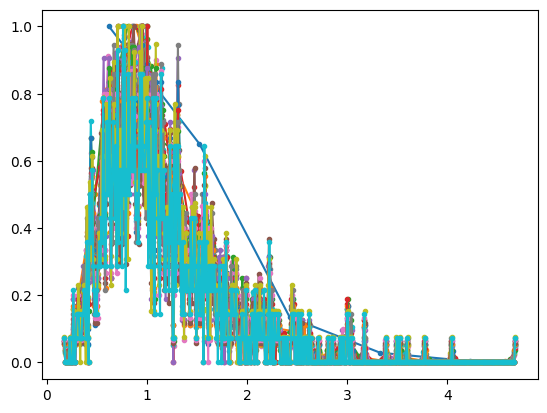

In [ ]:
# histograms with increasing bins

bins2try = np.round(np.linspace(5,n/2,30))

for bini in range(len(bins2try)):
  y,x = np.histogram(data,int(bins2try[bini]))
  x = (x[1:]+x[:-1])/2
  y = y/np.max(y)
  plt.plot(x,y,'.-')

## Violin plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

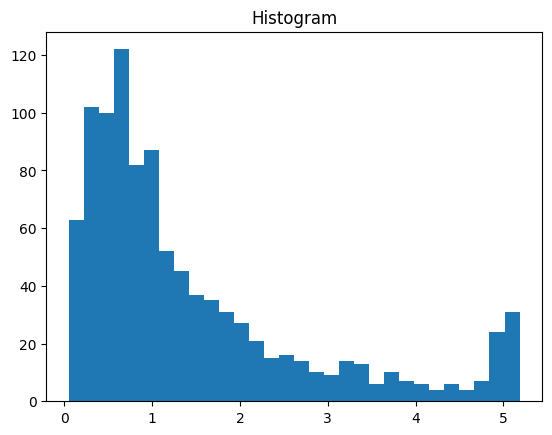

In [ ]:
n = 1000
thresh = 5 # threshold for cropping data

data = np.exp(np.random.randn(n))
# all data > thresh is redefined to be thresh + normally distributed
# random numbers scaled down by a factor of 10
data[data>thresh] = thresh + np.random.randn(sum(data>thresh))*.1

plt.hist(data,30)
plt.title('Histogram')
plt.show()

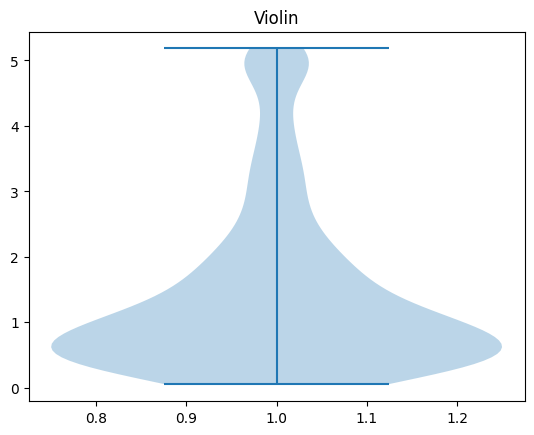

In [ ]:
plt.violinplot(data)
plt.title('Violin')
plt.show()

<Axes: >

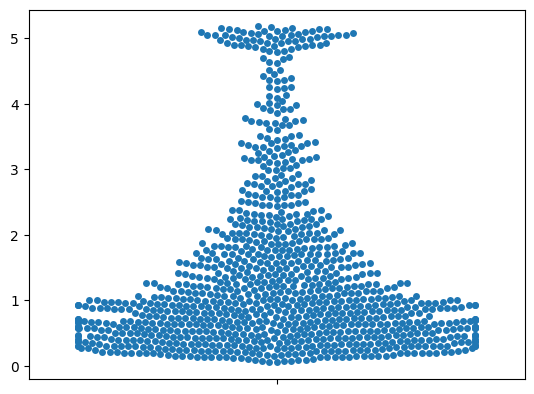

In [ ]:
import seaborn as sns

sns.swarmplot(data, orient='v')

<Axes: >

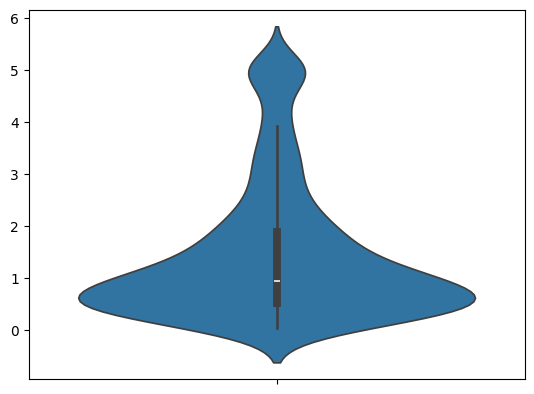

In [ ]:
sns.violinplot(data, orient='v')

## Split violin plots

In [ ]:
import pandas as pd

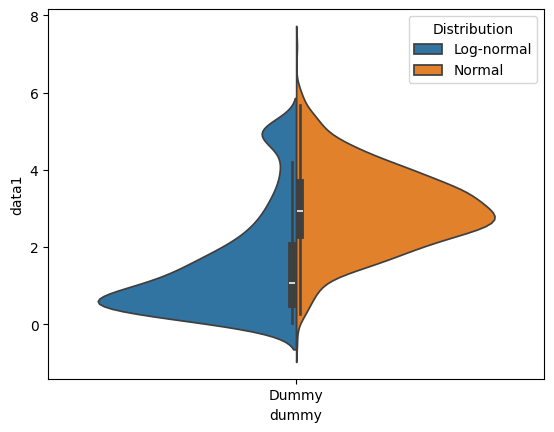

In [ ]:
n = 1000
thresh = 5

data = np.exp(np.random.randn(n))
data[data > thresh] = thresh + np.random.randn(sum(data > thresh)) * .1

data1 = np.random.randn(n) + 3

a = np.array(['Log-normal'] * n)
b = np.array(['Normal'] * n)

col3 = np.concatenate((a, b))
dataf = np.concatenate((data, data1))

c = np.array(['Dummy'] * n * 2)

# create 'tidy' dataframe
df = pd.DataFrame({'data1': dataf, 'Distribution': col3, 'dummy': c})

sns.violinplot(data=df, x='dummy', y='data1', hue='Distribution', orient='v', split=True)
plt.show()

## Shannon entropy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

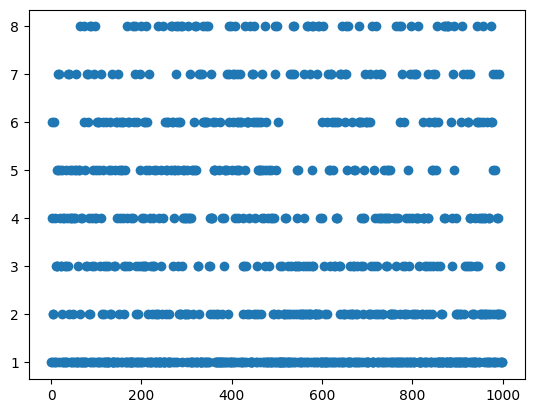

In [2]:
## "discrete" entropy

N = 1000
numbers = np.ceil(8*np.random.rand(N)**2)

# get counts and probabilities
u = np.unique(numbers)
probs = np.zeros(len(u))

plt.plot(numbers, 'o')

for ui in range(len(u)):
  probs[ui] = sum(numbers == u[ui])/N

# compute entropy
entropee = -sum(probs*np.log2(probs+np.finfo(float).eps))
# adding the epsilon value, closest Python will get to 0
# this ensures we never do log2(0)

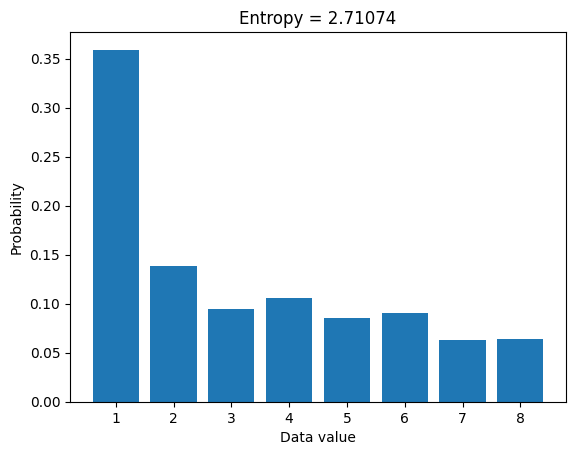

In [4]:
# plot
plt.bar(u, probs)
plt.title(f'Entropy = {entropee:.5f}')
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

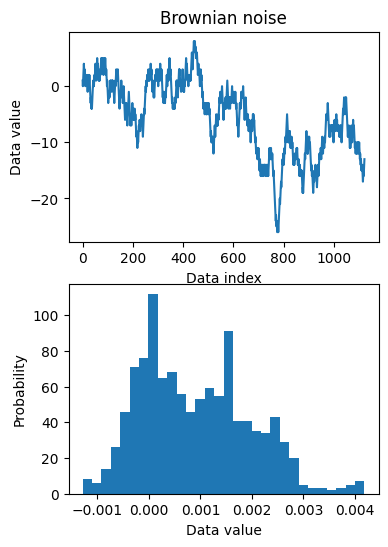

In [5]:
## for random variables

# create Brownian noise
N = 1123
brownnoise = np.cumsum(np.sign(np.random.randn(N)))

fig, ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(brownnoise)
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')
ax[0].set_title('Brownian noise')

ax[1].hist(brownnoise/sum(brownnoise), 30)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Probability')
plt.show()

In [6]:
## compute entropy

nbins = 50

nPerBin, bins = np.histogram(brownnoise, nbins)
probs = nPerBin/sum(nPerBin)

# compute entropy
entropee = -sum(probs*np.log2(probs+np.finfo(float).eps))

print(f'Entropy = {entropee}')

Entropy = 4.644531094953189


In [7]:
# entropy on continuous data is sensitive to number of bins
# lesser the bins, lower the entropy

Bins = 20, Entropy = 3.865485427162234
Bins = 24, Entropy = 4.030791059132805
Bins = 28, Entropy = 4.258296496942428
Bins = 32, Entropy = 4.541927140712982
Bins = 36, Entropy = 4.644531094953189
Bins = 40, Entropy = 4.644531094953189
Bins = 44, Entropy = 4.644531094953189
Bins = 48, Entropy = 4.644531094953189
Bins = 52, Entropy = 4.644531094953189
Bins = 56, Entropy = 4.644531094953189


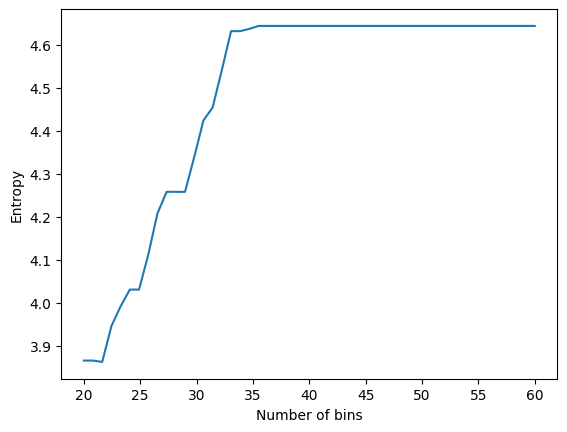

In [10]:
entroList = []
nbins = np.linspace(20, 60)

for i in range(len(nbins)):
  nPerBin, bins = np.histogram(brownnoise, int(nbins[i]))
  probs = nPerBin/sum(nPerBin)

  entro = -sum(probs*np.log2(probs+np.finfo(float).eps))
  entroList.append(entro)

  if i % 5 == 0:
    print(f'Bins = {int(nbins[i])}, Entropy = {entro}')

plt.plot(nbins, entroList)
plt.xlabel('Number of bins')
plt.ylabel('Entropy')
plt.show()